In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('final_df.csv',encoding='cp949')
data.head()

,id,q1_1,q1_2,q1_3,q1_4,q1_5,q3,q4,d1,d4,...,q33,q34_1,q34_2,q34_3,q52,q53,q54,q55,d12_1,d16
0,3,8,8,9,8,8,9,9,1,1,...,3,3,3,4,3,3,8,8,0,1
1,4,8,9,7,8,7,8,6,1,1,...,3,3,3,4,2,2,3,3,0,1
2,18,8,8,7,7,7,7,6,1,1,...,3,4,4,3,2,2,6,6,300,1
3,36,8,9,8,8,7,7,8,2,1,...,3,3,3,3,3,3,7,8,0,1
4,43,7,8,8,9,8,8,9,2,1,...,3,3,3,4,3,3,7,8,0,1


In [5]:
data.columns

Index(['id', 'q1_1', 'q1_2', 'q1_3', 'q1_4', 'q1_5', 'q3', 'q4', 'd1', 'd4',
       'q5_3', 'q28_1', 'q28_2', 'q28_3', 'q28_4', 'q47_2', 'q47_3', 'q47_4',
       'q47_9', 'q47_12', 'q48_1', 'q48_2', 'q48_3', 'q48_6', 'q48_7', 'q17_1',
       'q17_2', 'q17_3', 'q17_4', 'q17_5', 'q17_6', 'q17_7', 'q17_8', 'q17_9',
       'q21_1', 'q33', 'q34_1', 'q34_2', 'q34_3', 'q52', 'q53', 'q54', 'q55',
       'd12_1', 'd16'],
      dtype='object')

In [6]:
data['d12_1'].unique()

array([  0, 300, 200, 600, 100, 400, 800, 500, 700])

In [7]:
y=pd.read_csv('social_iso.csv',encoding='cp949')

In [8]:
y.head()

,Unnamed: 0,id,social_iso
0,0,3,16
1,1,4,11
2,2,18,17
3,3,36,12
4,4,43,14


In [9]:
list(y[['id']])==list(data[['id']])

True

In [10]:
#plt.hist(y['social_iso'])

In [11]:
mn=y['social_iso'].min()
mx=y['social_iso'].max()
data['new_y']=y['social_iso'].apply(lambda x:(x-mn)/(mx-mn))

In [12]:
data['new_y']

0       0.4375
1       0.1250
2       0.5000
3       0.1875
4       0.3125
         ...  
1272    0.4375
1273    0.6250
1274    0.5625
1275    0.5625
1276    0.5000
Name: new_y, Length: 1277, dtype: float64

In [13]:
#plt.hist(data['new_y'])

In [14]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 94 kB/s 


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from catboost import CatBoostRegressor

In [16]:
df=data.copy()
X=df.drop(['id', 'new_y'],axis=1) # iso_bin
#X=df.drop(['id','social_iso'])
y=df['new_y']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
cat_reg = CatBoostRegressor(subsample=0.55, n_estimators=900, max_depth=7, learning_rate=0.03, 
                            colsample_bylevel= 0.7)
cat_reg.fit(X_train,y_train)

0:	learn: 0.1584734	total: 58.2ms	remaining: 52.3s
1:	learn: 0.1578010	total: 64.9ms	remaining: 29.1s
2:	learn: 0.1571898	total: 70ms	remaining: 20.9s
3:	learn: 0.1566767	total: 74.5ms	remaining: 16.7s
4:	learn: 0.1560922	total: 77.3ms	remaining: 13.8s
5:	learn: 0.1555235	total: 83.9ms	remaining: 12.5s
6:	learn: 0.1548647	total: 90.1ms	remaining: 11.5s
7:	learn: 0.1543988	total: 96.2ms	remaining: 10.7s
8:	learn: 0.1538030	total: 110ms	remaining: 10.9s
9:	learn: 0.1532377	total: 113ms	remaining: 10.1s
10:	learn: 0.1526178	total: 121ms	remaining: 9.77s
11:	learn: 0.1520723	total: 126ms	remaining: 9.35s
12:	learn: 0.1515401	total: 132ms	remaining: 8.99s
13:	learn: 0.1511457	total: 138ms	remaining: 8.73s
14:	learn: 0.1505356	total: 140ms	remaining: 8.28s
15:	learn: 0.1501218	total: 142ms	remaining: 7.85s
16:	learn: 0.1498186	total: 145ms	remaining: 7.5s
17:	learn: 0.1493269	total: 150ms	remaining: 7.34s
18:	learn: 0.1488933	total: 154ms	remaining: 7.16s
19:	learn: 0.1484152	total: 160ms	re

In [20]:
y_pred = cat_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse) 
print("MAE: %.4f"%mae)

MSE: 0.0172
RMSE: 0.1313
MAE: 0.1010


# SAHP

In [21]:
PATH=""

In [22]:
!pip install shap
import shap
shap.initjs()
explainer = shap.TreeExplainer(cat_reg)
shap_values = explainer.shap_values(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [23]:
X_test

,q1_1,q1_2,q1_3,q1_4,q1_5,q3,q4,d1,d4,q5_3,...,q33,q34_1,q34_2,q34_3,q52,q53,q54,q55,d12_1,d16
411,9,7,3,6,1,7,3,1,1,4,...,4,4,3,3,2,2,8,5,0,3
722,8,1,1,7,8,8,7,1,1,3,...,3,4,3,3,2,2,6,7,300,2
915,5,5,5,5,5,3,2,1,1,2,...,2,4,3,4,1,1,2,2,0,3
51,7,4,5,6,8,7,6,1,1,4,...,2,4,3,3,1,1,5,6,0,1
44,7,6,6,6,7,7,7,2,2,3,...,2,3,2,2,2,2,4,4,200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,7,6,4,6,5,7,7,1,1,2,...,3,4,2,3,1,1,6,6,400,2
1140,6,4,4,6,8,6,5,1,1,2,...,2,4,2,4,1,1,7,8,0,1
533,7,4,4,6,7,7,6,2,1,1,...,3,3,3,3,2,2,5,5,200,1
620,7,5,7,4,6,5,4,1,1,3,...,3,4,1,3,2,2,7,7,800,1


Text(0.5, 1.0, 'Social Isolation - Relationship')

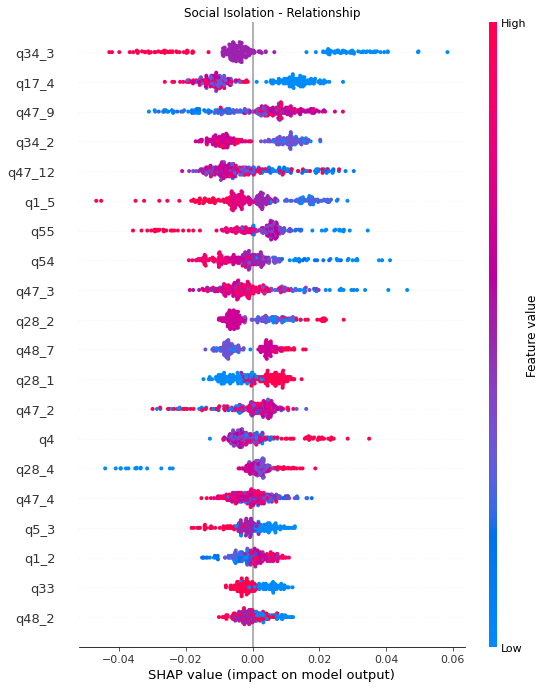

In [25]:
fig = shap.summary_plot(shap_values, X_test,show=False)
#plt.show(fig)
plt.title('Social Isolation - Relationship')
#plt.savefig(f'{PATH}/shap-yh.png', dpi=300, bbox_inches="tight")

In [26]:
shap.Explanation.abs.mean(0)

shap.Explanation.abs.mean(0)

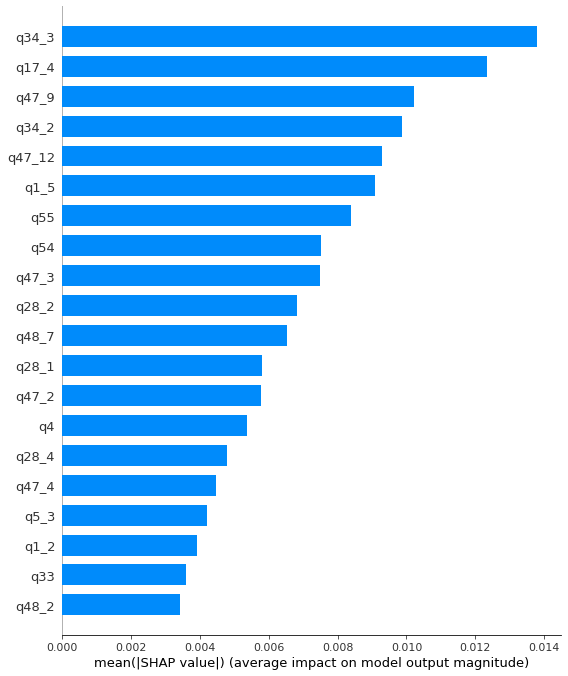

In [27]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

- 주요 변수 개수 10개로 줄이기

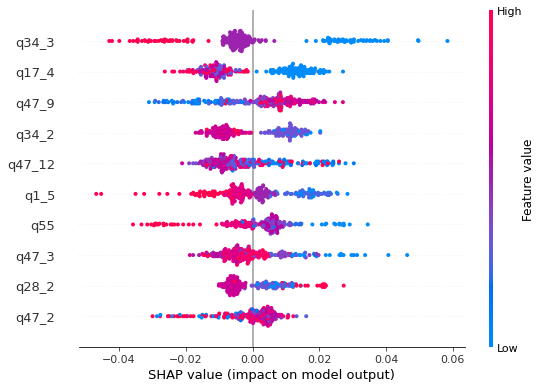

In [28]:
features=['34_3', '17_4', '47_3', '47_9', '34_2', '55', '47_12', '28_2', '47_2', '1_5']
features=['q'+i for i in features]
indx=[X_test.columns.tolist().index(x) for x in features] 
fig=shap.summary_plot(shap_values.T[indx].T,X_test.iloc[:,indx],show=False)
plt.savefig(f'{PATH}/shap-yh.png', dpi=300, bbox_inches="tight")

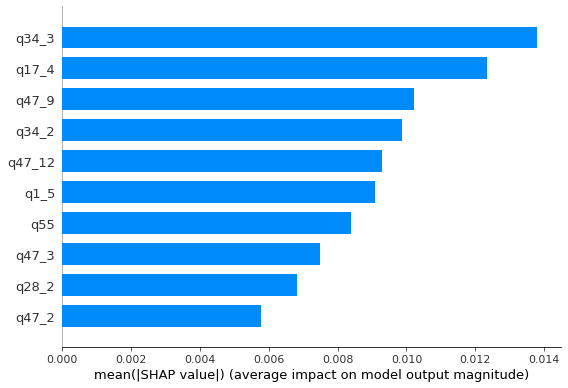

In [29]:
fig2=shap.summary_plot(shap_values.T[indx].T,X_test.iloc[:,indx],plot_type='bar',show=False)
#plt.savefig(f'{PATH}/FI-yh.png', dpi=300, bbox_inches="tight")